In [5]:
import re
import spacy
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from string import punctuation
from wordcloud import WordCloud, STOPWORDS

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords


sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from nltk import bigrams
import pickle

import os
import gensim

from pprint import pprint

import matplotlib.colors as mcolors
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel
from collections import Counter

In [6]:
method_justification = pd.read_csv('/Users/swagyangjh/Desktop/Survey_Results_Merged.csv')

In [7]:
justification = method_justification['cf_Justification']
justification
clean_justification = justification.dropna(axis=0,how='all')  
clean_justification = clean_justification[1:]
clean_justification.head()

4    It seems a fairly simple image. Only three bra...
5    The image is easy to understand, 24 patients w...
6    The quality of the image is okay, just that th...
7    62 people went to the icu but only 60 are acco...
8    You can't tell if they went back to the ICU af...
Name: cf_Justification, dtype: object

# Extend stopwords


In [8]:

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'image','edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'rather', 'lot', 'make', 'want', 'seem', 'run', 'need', 'even', 'even', 'also', 'may', 'take', 'come'])


# Tokenize Sentences and Clean

In [9]:
def sent_to_words(sentences):
    for sent in sentences:
        
        sent = re.sub('[,\.!?]', '', sent)  # remove emails
        sent = sent.lower()  
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  


In [10]:
data = clean_justification.tolist()

data_words = list(sent_to_words(data))

data_words

[['it', 'seems', 'fairly', 'simple', 'image', 'only', 'three', 'branches'],
 ['the',
  'image',
  'is',
  'easy',
  'to',
  'understand',
  'patients',
  'went',
  'to',
  'floor',
  'and',
  'got',
  'discharged',
  'alive',
  'other',
  'facts',
  'are',
  'not',
  'shown',
  'in',
  'the',
  'image'],
 ['the',
  'quality',
  'of',
  'the',
  'image',
  'is',
  'okay',
  'just',
  'that',
  'the',
  'last',
  'fact',
  'did',
  'not',
  'match',
  'the',
  'description',
  'on',
  'the',
  'image'],
 ['people',
  'went',
  'to',
  'the',
  'icu',
  'but',
  'only',
  'are',
  'accounted',
  'for',
  'between',
  'dying',
  'or',
  'moving',
  'to',
  'the',
  'floor',
  'so',
  'there',
  'are',
  'people',
  'unaccounted',
  'for'],
 ['you',
  'cant',
  'tell',
  'if',
  'they',
  'went',
  'back',
  'to',
  'the',
  'icu',
  'after',
  'being',
  'on',
  'the',
  'floor'],
 ['the',
  'activities',
  'in',
  'the',
  'fact',
  'are',
  'not',
  'shown',
  'in',
  'the',
  'image'],


In [11]:
# remove stopwords
sentences=[]
for line in data_words:
    try:
        segs = [i for i in line if i not in stop_words]
        sentences.append(segs)
    except:
        print (line)
        continue

In [12]:
sentences

[['seems', 'fairly', 'simple', 'three', 'branches'],
 ['easy',
  'understand',
  'patients',
  'went',
  'floor',
  'got',
  'discharged',
  'alive',
  'facts',
  'shown'],
 ['quality', 'okay', 'last', 'fact', 'match', 'description'],
 ['people',
  'went',
  'icu',
  'accounted',
  'dying',
  'moving',
  'floor',
  'people',
  'unaccounted'],
 ['cant', 'tell', 'went', 'back', 'icu', 'floor'],
 ['activities', 'fact', 'shown'],
 ['better', 'info'],
 ['nothing',
  'shows',
  'going',
  'back',
  'behavior',
  'continued',
  'along',
  'discharge',
  'alive',
  'path'],
 ['chart',
  'spaced',
  'well',
  'little',
  'ambiguity',
  'outcome',
  'clearly',
  'labeled',
  'everyone',
  'accounted'],
 ['isnt', 'split', 'floor'],
 ['average', 'understanding'],
 ['discharged', 'fact', 'fact'],
 ['difficulty', 'trying', 'rate', 'people', 'floor'],
 ['easier',
  'understand',
  'two',
  'prior',
  'still',
  'without',
  'fully',
  'accounting',
  'everyone',
  'arrived',
  'chart',
  'clinical',


In [13]:
# Create Dictionary
id2word = Dictionary(sentences)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in sentences]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [14]:
for topic in lda_model.print_topics(num_topics=10, num_words=10):
    print (topic[1])

0.160*"information" + 0.087*"professors" + 0.074*"question" + 0.039*"started" + 0.029*"conference" + 0.020*"bit" + 0.019*"unable" + 0.018*"missing" + 0.017*"find" + 0.017*"text"
0.062*"cover" + 0.058*"entrance" + 0.049*"cars" + 0.040*"came" + 0.038*"seems" + 0.038*"says" + 0.037*"well" + 0.037*"little" + 0.036*"events" + 0.035*"vague"
0.118*"show" + 0.104*"graph" + 0.065*"able" + 0.048*"became" + 0.046*"none" + 0.034*"least" + 0.032*"hard" + 0.030*"info" + 0.025*"appears" + 0.021*"passed"
0.136*"professor" + 0.132*"assistant" + 0.062*"wasnt" + 0.056*"questions" + 0.041*"newspaper" + 0.032*"answer" + 0.026*"first" + 0.026*"images" + 0.022*"enough" + 0.019*"made"
0.052*"give" + 0.044*"easier" + 0.034*"long" + 0.032*"two" + 0.024*"disagree" + 0.023*"though" + 0.023*"place" + 0.022*"followed" + 0.021*"main" + 0.020*"curved"
0.192*"understand" + 0.122*"easy" + 0.071*"facts" + 0.070*"difficult" + 0.052*"believe" + 0.035*"read" + 0.019*"match" + 0.019*"somewhat" + 0.017*"exactly" + 0.017*"sta

In [15]:
# 
# structure the main topic
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp[:10]])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,10), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=sentences)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.682047,"cover, entrance, cars, came, seems, says, well...","[seems, fairly, simple, three, branches]"
1,1,5.0,0.736166,"understand, easy, facts, difficult, believe, r...","[easy, understand, patients, went, floor, got,..."
2,2,5.0,0.727372,"understand, easy, facts, difficult, believe, r...","[quality, okay, last, fact, match, description]"
3,3,9.0,0.707528,"phd, people, line, mentioned, thats, informati...","[people, went, icu, accounted, dying, moving, ..."
4,4,6.0,0.728722,"previous, background, much, far, cant, asking,...","[cant, tell, went, back, icu, floor]"
5,5,7.0,0.775000,"activities, shown, fact, see, data, numbers, d...","[activities, fact, shown]"
6,6,2.0,0.699985,"show, graph, able, became, none, least, hard, ...","[better, info]"
7,7,8.0,0.917910,"shows, sense, conferences, lines, didnt, tree,...","[nothing, shows, going, back, behavior, contin..."
8,8,1.0,0.917803,"cover, entrance, cars, came, seems, says, well...","[chart, spaced, well, little, ambiguity, outco..."
9,9,7.0,0.774927,"activities, shown, fact, see, data, numbers, d...","[isnt, split, floor]"


In [16]:
"""get samples of sentences that most represent a given topic."""
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.762487,"information, professors, question, started, conference, bit, unable, missing, find, text","[every, time, read, right, logical, correspond, text]"
1,1.0,0.917803,"cover, entrance, cars, came, seems, says, well, little, events, vague","[chart, spaced, well, little, ambiguity, outcome, clearly, labeled, everyone, accounted]"
2,2.0,0.699985,"show, graph, able, became, none, least, hard, info, appears, passed","[better, info]"
3,3.0,0.758329,"professor, assistant, wasnt, questions, newspaper, answer, first, images, enough, made","[looked, counted, questions, assistant, question, chose, neither, information, ab, assistants, a..."
4,4.0,0.819944,"give, easier, long, two, disagree, though, place, followed, main, curved","[goof, still, misses, factors]"
5,5.0,0.774998,"understand, easy, facts, difficult, believe, read, match, somewhat, exactly, stated","[somewhat, difficult, understand]"
6,6.0,0.744569,"previous, background, much, far, cant, asking, actual, shot, left, offense","[gives, information, happened, unc, offense, whether, shots, free, throws, made, umd, offense, t..."
7,7.0,0.918135,"activities, shown, fact, see, data, numbers, dont, mention, clear, number","[gcs, one, activities, fact, shown, pathways, numbers, label, numbers, represent]"
8,8.0,0.917910,"shows, sense, conferences, lines, didnt, tree, journal, attend, nothing, places","[nothing, shows, going, back, behavior, continued, along, discharge, alive, path]"
9,9.0,0.849551,"phd, people, line, mentioned, thats, informative, publications, changes, looks, unsure","[difficulty, trying, rate, people, floor]"


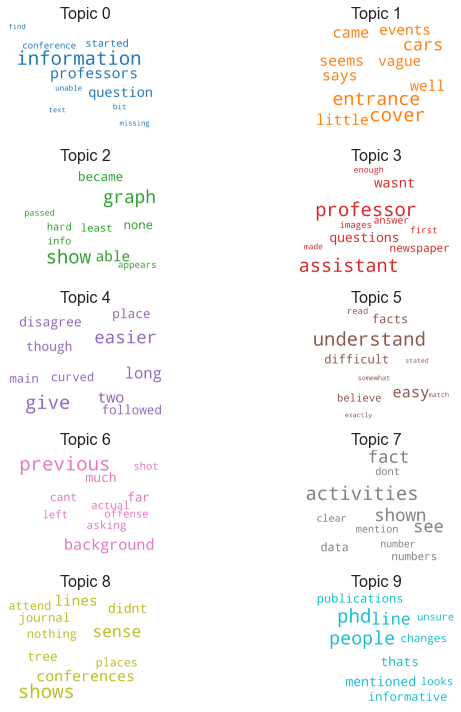

In [17]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [18]:

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


/Users/swagyangjh/opt/anaconda3/envs/R2F/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/swagyangjh/opt/anaconda3/envs/R2F/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


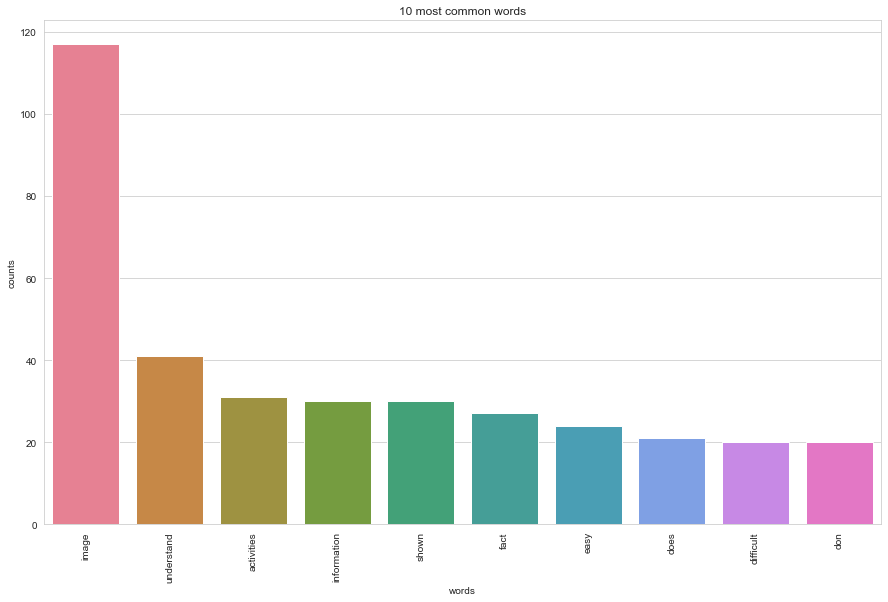

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(clean_justification)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [20]:
# delete the bigrams which do not contain topic words
def word_drop_keywords(x):
    arr = [i.strip() for i in  x[0].split(",") if i.strip() ]
    if len(arr) >=5:
        key_words = arr[:5]
    else:
        key_words = arr
    words = x[1]
    keep_words = []
    for i in range(len(words)):
        
        if i == 0:
            if len(set(words[i:i+1])&set(key_words)) > 0 :
                
                keep_words.append(words[i])
        elif i < len(words)-1 and i > 0:
            if len(set(words[i:i+2])&set(key_words)) > 0 or len(set(words[i-1:i+1])&set(key_words)) > 0 :

                keep_words.append(words[i])
        else:
            if words[i-1] in key_words:
                keep_words.append(words[i])
    return keep_words

In [21]:
new_text = df_dominant_topic[["Keywords","Text"]].apply(lambda x:word_drop_keywords(x),axis=1)
new_text = [i for i in new_text if len(i) >0]


In [60]:
new_data = [" ".join(i) for i in new_text ]
new_data

['seems fairly',
 'easy understand patients alive facts shown',
 'people went floor people unaccounted',
 'cant tell',
 'activities fact shown',
 'shows going',
 'fact fact',
 'rate people floor',
 'easier understand two prior',
 'answer questions accurately',
 'people missing',
 'patients information missing',
 'represents people another',
 'made questions easy',
 'room activities shown',
 'er',
 'two facts obvious',
 'fact discharged included data visualized',
 'however able verify alone show happens actually show patients icu graph continues',
 'one activities fact shown pathways',
 'show gcs',
 'show terms',
 'graph data point',
 'questions answer activity wasnt listed',
 'difficult',
 'step shown statement',
 'given didnt sense data',
 'easier picture',
 'difficult understand last',
 'entails background tell',
 'see gcs dont see confirmed',
 'answer questions properly',
 'confirm question numbers information activity',
 'see gcp data listed',
 'still two prominent',
 'explanations

In [73]:
# Build the bigram models
bigram = gensim.models.Phrases(new_data, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)




In [68]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [71]:
data_words_bigrams = make_bigrams(data_ready)

In [72]:
data_words_bigrams

[['fairly', 'simple', 'branch'],
 ['easy',
  'understand',
  'patient',
  'floor',
  'discharge',
  'alive',
  'fact',
  'show'],
 ['quality', 'last', 'fact', 'match', 'description'],
 ['people', 'account', 'die', 'move', 'floor', 'people', 'unaccounte'],
 ['back', 'icu', 'floor'],
 ['activity', 'fact', 'show'],
 ['well'],
 ['show', 'back', 'behavior', 'continue', 'discharge', 'alive', 'path'],
 ['chart',
  'space',
  'well',
  'little',
  'ambiguity',
  'outcome',
  'clearly',
  'label',
  'account'],
 ['split', 'floor'],
 ['average', 'understanding'],
 ['discharge', 'fact', 'fact'],
 ['difficulty', 'rate', 'people', 'floor'],
 ['easy',
  'understand',
  'prior',
  'still',
  'fully',
  'account',
  'arrive',
  'chart',
  'clinical',
  'meaning'],
 ['accord', 'chart', 'discharge', 'alive', 'back'],
 ['easy', 'understand', 'answer', 'question', 'accurately', 'base'],
 ['people', 'miss', 'icu', 'floor', 'die'],
 ['find',
  'easy',
  'follow',
  'diagram',
  'understand',
  'path',
  'pa

In [24]:
# keep N, adj, verb,adv,
# text preprocessing
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    # texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    for sent in texts:
        # print(sent)
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(new_data) 


In [26]:
data_ready

[['fairly'],
 ['easy', 'understand', 'patient', 'alive', 'fact', 'show'],
 ['people', 'floor', 'people', 'unaccounte'],
 ['tell'],
 ['activity', 'fact', 'show'],
 ['show'],
 ['fact', 'fact'],
 ['rate', 'people', 'floor'],
 ['easy', 'understand', 'prior'],
 ['answer', 'question', 'accurately'],
 ['people', 'miss'],
 ['patient', 'information', 'miss'],
 ['represent', 'people'],
 ['question', 'easy'],
 ['room', 'activity', 'show'],
 [],
 ['fact', 'obvious'],
 ['discharge', 'include', 'datum', 'visualize'],
 ['however',
  'able',
  'verify',
  'alone',
  'show',
  'happen',
  'actually',
  'show',
  'patient',
  'continue'],
 ['activity', 'fact', 'show', 'pathway'],
 [],
 ['show', 'term'],
 ['point'],
 ['question', 'answer', 'activity', 'list'],
 ['difficult'],
 ['step', 'show', 'statement'],
 ['give', 'sense', 'datum'],
 ['easy', 'picture'],
 ['difficult', 'understand', 'last'],
 ['entail', 'background', 'tell'],
 ['see', 'gcs', 'see', 'confirm'],
 ['answer', 'question', 'properly'],
 ['c

In [23]:
# Create Dictionary
id2word = Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [24]:
for topic in lda_model.print_topics(num_topics=5, num_words=10):
    print (topic[1])

0.130*"cover" + 0.088*"previous" + 0.085*"car" + 0.085*"entrance" + 0.066*"event" + 0.033*"graph" + 0.032*"pass" + 0.022*"set" + 0.014*"left" + 0.014*"vehicle"
0.123*"professor" + 0.099*"question" + 0.098*"information" + 0.079*"assistant" + 0.055*"understand" + 0.045*"able" + 0.044*"start" + 0.040*"fact" + 0.033*"data" + 0.033*"become"
0.111*"ask" + 0.068*"give" + 0.044*"read" + 0.036*"list" + 0.031*"follow" + 0.023*"bite" + 0.023*"find" + 0.022*"explicitly" + 0.022*"anywhere" + 0.021*"believe"
0.088*"number" + 0.085*"tree" + 0.061*"mention" + 0.053*"clear" + 0.040*"datum" + 0.035*"none" + 0.028*"match" + 0.027*"represent" + 0.025*"side" + 0.020*"mean"
0.272*"show" + 0.176*"activity" + 0.170*"fact" + 0.053*"people" + 0.016*"numerical" + 0.016*"discrepancy" + 0.013*"journal" + 0.011*"kind" + 0.011*"wither" + 0.009*"tell"


In [25]:
# 
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp][:10])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,5), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [26]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.50575,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[understand, patient, alive, fact, show]"
1,1,4.0,0.83977,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[people, floor, people, unaccounte]"
2,2,4.0,0.59987,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell",[tell]
3,3,4.0,0.79989,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[activity, fact, show]"
4,4,4.0,0.60000,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell",[show]
5,5,4.0,0.73287,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[fact, fact]"
6,6,4.0,0.79962,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[rate, people, floor]"
7,7,1.0,0.79951,"professor, question, information, assistant, understand, able, start, fact, data, become","[answer, question, accurately]"
8,8,4.0,0.40083,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[people, miss]"
9,9,1.0,0.79991,"professor, question, information, assistant, understand, able, start, fact, data, become","[patient, information, miss]"


In [27]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.83999,"cover, previous, car, entrance, event, graph, pass, set, left, vehicle","[car, pass, car, camper]"
1,1.0,0.88508,"professor, question, information, assistant, understand, able, start, fact, data, become","[fact, start, assistant, professor, data, question]"
2,2.0,0.79999,"ask, give, read, list, follow, bite, find, explicitly, anywhere, believe","[bite, follow, find]"
3,3.0,0.91110,"number, tree, mention, clear, datum, none, match, represent, side, mean","[number, mean, none, number, add, score, number, total]"
4,4.0,0.89997,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[activity, fact, show, activity, show, numerical, discrepancy]"


In [28]:
for topic in lda_model.print_topics(num_topics=10, num_words=10):
    print (topic[1])

0.130*"cover" + 0.088*"previous" + 0.085*"car" + 0.085*"entrance" + 0.066*"event" + 0.033*"graph" + 0.032*"pass" + 0.022*"set" + 0.014*"left" + 0.014*"vehicle"
0.123*"professor" + 0.099*"question" + 0.098*"information" + 0.079*"assistant" + 0.055*"understand" + 0.045*"able" + 0.044*"start" + 0.040*"fact" + 0.033*"data" + 0.033*"become"
0.111*"ask" + 0.068*"give" + 0.044*"read" + 0.036*"list" + 0.031*"follow" + 0.023*"bite" + 0.023*"find" + 0.022*"explicitly" + 0.022*"anywhere" + 0.021*"believe"
0.088*"number" + 0.085*"tree" + 0.061*"mention" + 0.053*"clear" + 0.040*"datum" + 0.035*"none" + 0.028*"match" + 0.027*"represent" + 0.025*"side" + 0.020*"mean"
0.272*"show" + 0.176*"activity" + 0.170*"fact" + 0.053*"people" + 0.016*"numerical" + 0.016*"discrepancy" + 0.013*"journal" + 0.011*"kind" + 0.011*"wither" + 0.009*"tell"


In [29]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.83999,"cover, previous, car, entrance, event, graph, pass, set, left, vehicle","[car, pass, car, camper]"
1,1.0,0.88508,"professor, question, information, assistant, understand, able, start, fact, data, become","[fact, start, assistant, professor, data, question]"
2,2.0,0.79999,"ask, give, read, list, follow, bite, find, explicitly, anywhere, believe","[bite, follow, find]"
3,3.0,0.91110,"number, tree, mention, clear, datum, none, match, represent, side, mean","[number, mean, none, number, add, score, number, total]"
4,4.0,0.89997,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[activity, fact, show, activity, show, numerical, discrepancy]"


In [30]:
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.50575,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[understand, patient, alive, fact, show]"
1,1,4.0,0.83977,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[people, floor, people, unaccounte]"
2,2,4.0,0.59987,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell",[tell]
3,3,4.0,0.79989,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell","[activity, fact, show]"
4,4,4.0,0.60000,"show, activity, fact, people, numerical, discrepancy, journal, kind, wither, tell",[show]


In [29]:
# Get all the topic keywords and use them to calculate the top 5 keywords for each article

def slt_all_key_words(df_dominant_topic):
    all_kw = [ i.replace(" ","").split(",") for i in df_dominant_topic["Keywords"].values]
    all_kw_unique = set()
    for kw in all_kw:
        all_kw_unique = set(kw) | all_kw_unique
    return list(all_kw_unique)

# get top 5 key words
def doc_top5_words(txt,all_kv):
    kv_dic = {} 
    for k in txt:
        if k in all_kv:
            kv_dic[k] = kv_dic.get(k,0) + 1
    kv_dic = sorted(kv_dic,key=lambda x: x[1],reverse=True)
    top5_key = []
    for i,v in enumerate(kv_dic):
        if i <= 4:
            top5_key.append(v)
    return top5_key

# Counting the frequency of occurrence of another word in a phrase with a common keyword
def not_keywords_frequncy(text,common_keywords):
    word_dic = {}
    for grams in bigrams(text):
        if len(set([common_keywords]) & set(grams)) >0:
            tmp = list(set(grams).difference(set([common_keywords])))
            for k in tmp:
                word_dic[k] = word_dic.get(k,0) + 1
    return word_dic


# Vis
def draw_from_dict(dicdata,RANGE=10, heng=1):
    plt.figure(figsize=(10,8))
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    # print(by_value)
    x = []
    y = []
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    if heng == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        plt.show()
        return 
    elif heng == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        plt.show()
        return 
    else:
        return None

# all key words
all_key_words = slt_all_key_words(df_dominant_topic)

# Take any two reviews for analysis (manually choose by index)
news_tmp_1 = df_dominant_topic.iloc[0]
news_tmp_2 = df_dominant_topic.iloc[1]

# jutification text
news_text_1 = news_tmp_1["Text"]
news_text_2 = news_tmp_2["Text"]

# get the key word
keys_word_1 = doc_top5_words(news_text_1,all_key_words)
keys_word_2 =  doc_top5_words(news_text_2,all_key_words)

# common keywords
common_keywords = list(set(keys_word_1) & set(keys_word_2))
print("Common Topic words： ",common_keywords )



# Analyze the ratings of the other phrases of each keyword in turn
for keyword in common_keywords:
    print("Topic Word Analysis： ",keyword)
    word_dic_1 = not_keywords_frequncy(news_text_1,keyword)
    draw_from_dict(word_dic_1)

    word_dic_2 = not_keywords_frequncy(news_text_2,keyword)
    draw_from_dict(word_dic_2)

    print("\n")

Common Topic words：  []


# Build the Bigram, Trigram Models and Lemmatize

lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, I use spacy for lemmatization.

In [30]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data, min_count=2, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [32]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    print(texts)
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_lg", disable=['parser', 'ner'])
    for sent in texts:
        print(sent)
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data) 

[['seems', 'fairly', 'simple', 'three', 'branches'], ['easy', 'understand', 'patients', 'went', 'floor', 'got', 'discharged', 'alive', 'facts', 'shown'], ['quality', 'okay', 'last', 'fact', 'match', 'description'], ['people', 'went', 'icu', 'accounted', 'dying', 'moving', 'floor', 'people', 'unaccounted'], ['tell', 'went', 'back', 'icu', 'floor'], ['activities', 'fact', 'shown'], ['better', 'info'], ['nothing', 'shows', 'going', 'back', 'behavior', 'continued', 'along', 'discharge', 'alive', 'path'], ['chart', 'spaced', 'well', 'little', 'ambiguity', 'outcome', 'clearly', 'labeled', 'everyone', 'accounted'], ['split', 'floor'], ['average', 'understanding'], ['discharged', 'fact', 'fact'], ['difficulty', 'trying', 'rate', 'people', 'floor'], ['easier', 'understand', 'two', 'prior', 'still', 'without', 'fully', 'accounting', 'everyone', 'arrived', 'chart', 'clinical', 'meaning'], ['according', 'chart', 'discharged', 'alive', 'zero', 'going', 'back', 'icu'], ['images', 'easy', 'understand

['seems', 'fairly', 'simple', 'three', 'branches']
['easy', 'understand', 'patients', 'went', 'floor', 'got', 'discharged', 'alive', 'facts', 'shown']
['quality', 'okay', 'last', 'fact', 'match', 'description']
['people', 'went', 'icu', 'accounted', 'dying', 'moving', 'floor', 'people', 'unaccounted']
['tell', 'went', 'back', 'icu', 'floor']
['activities', 'fact', 'shown']
['better', 'info']
['nothing', 'shows', 'going', 'back', 'behavior', 'continued', 'along', 'discharge', 'alive', 'path']
['chart', 'spaced', 'well', 'little', 'ambiguity', 'outcome', 'clearly', 'labeled', 'everyone', 'accounted']
['split', 'floor']
['average', 'understanding']
['discharged', 'fact', 'fact']
['difficulty', 'trying', 'rate', 'people', 'floor']
['easier', 'understand', 'two', 'prior', 'still', 'without', 'fully', 'accounting', 'everyone', 'arrived', 'chart', 'clinical', 'meaning']
['according', 'chart', 'discharged', 'alive', 'zero', 'going', 'back', 'icu']
['images', 'easy', 'understand', 'answer', 'qu

['believe', 'see', 'fact', 'started', 'assistant', 'professors', 'see', 'data', 'question']
['little', 'vague', 'background', 'information', 'says', 'cover', 'events', 'professors', 'careers', 'seems', 'cover', 'previous', 'questions', 'mention', 'book', 'newspaper', 'publishing', 'well', 'working', 'assistant', 'professor', 'see']
['show', 'became', 'professor', 'phd', 'able', 'sense', 'came']
['easy', 'understand', 'activities', 'fact', 'shown']


In [34]:
data_ready

[['fairly', 'simple', 'branch'],
 ['understand', 'patient', 'floor', 'discharge', 'alive', 'fact', 'show'],
 ['quality', 'last', 'fact', 'match', 'description'],
 ['people', 'account', 'die', 'move', 'floor', 'people', 'unaccounte'],
 ['back', 'icu', 'floor'],
 ['activity', 'fact', 'show'],
 ['well'],
 ['show', 'back', 'behavior', 'continue', 'discharge', 'alive', 'path'],
 ['chart',
  'space',
  'well',
  'little',
  'ambiguity',
  'outcome',
  'clearly',
  'label',
  'account'],
 ['split', 'floor'],
 ['average', 'understanding'],
 ['discharge', 'fact', 'fact'],
 ['difficulty', 'rate', 'people', 'floor'],
 ['understand',
  'prior',
  'still',
  'fully',
  'account',
  'arrive',
  'chart',
  'clinical',
  'meaning'],
 ['accord', 'chart', 'discharge', 'alive', 'back'],
 ['understand', 'answer', 'question', 'accurately', 'base'],
 ['people', 'miss', 'icu', 'floor', 'die'],
 ['find',
  'follow',
  'diagram',
  'understand',
  'path',
  'patient',
  'information',
  'miss',
  'branch',
  '

# Build the Topic Model
we can set the num of topic to choose how many topic we want 

In [35]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.102*"information" + 0.034*"conference" + 0.033*"graph" + 0.027*"career" + '
  '0.026*"give" + 0.023*"clear" + 0.018*"read" + 0.018*"none" + 0.016*"first" '
  '+ 0.015*"regard"'),
 (1,
  '0.113*"show" + 0.084*"fact" + 0.077*"activity" + 0.061*"professor" + '
  '0.060*"assistant" + 0.058*"question" + 0.034*"number" + 0.028*"entrance" + '
  '0.026*"mention" + 0.020*"ask"'),
 (2,
  '0.124*"understand" + 0.042*"previous" + 0.039*"start" + 0.027*"event" + '
  '0.025*"well" + 0.023*"hard" + 0.022*"place" + 0.018*"much" + 0.017*"chart" '
  '+ 0.014*"clearly"'),
 (3,
  '0.059*"professor" + 0.048*"difficult" + 0.037*"cover" + 0.028*"become" + '
  '0.027*"newspaper" + 0.027*"publish" + 0.024*"people" + 0.024*"miss" + '
  '0.022*"sense" + 0.022*"background"')]


# Attention
In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.

In [36]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8100,"information, conference, graph, career, give, clear, read, none, first, regard","[fairly, simple, branch]"
1,1,2.0,0.6470,"understand, previous, start, event, well, hard, place, much, chart, clearly","[understand, patient, floor, discharge, alive, fact, show]"
2,2,0.0,0.4607,"information, conference, graph, career, give, clear, read, none, first, regard","[quality, last, fact, match, description]"
3,3,3.0,0.9047,"professor, difficult, cover, become, newspaper, publish, people, miss, sense, background","[people, account, die, move, floor, people, unaccounte]"
4,4,3.0,0.8081,"professor, difficult, cover, become, newspaper, publish, people, miss, sense, background","[back, icu, floor]"
5,5,1.0,0.8125,"show, fact, activity, professor, assistant, question, number, entrance, mention, ask","[activity, fact, show]"
6,6,2.0,0.6247,"understand, previous, start, event, well, hard, place, much, chart, clearly",[well]
7,7,2.0,0.7753,"understand, previous, start, event, well, hard, place, much, chart, clearly","[show, back, behavior, continue, discharge, alive, path]"
8,8,2.0,0.8251,"understand, previous, start, event, well, hard, place, much, chart, clearly","[chart, space, well, little, ambiguity, outcome, clearly, label, account]"
9,9,1.0,0.4173,"show, fact, activity, professor, assistant, question, number, entrance, mention, ask","[split, floor]"


# get samples of sentences that most represent a given topic.

In [37]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9531,"information, conference, graph, career, give, clear, read, none, first, regard","[list, graph, put, disagree, read, opinion, intuitive, long, journal, entry, assume, later, care..."
1,1.0,0.9167,"show, fact, activity, professor, assistant, question, number, entrance, mention, ask","[activity, fact, show, activity, show, numerical, discrepancy, fact]"
2,2.0,0.9243,"understand, previous, start, event, well, hard, place, much, chart, clearly","[understand, prior, still, fully, account, arrive, chart, clinical, meaning]"
3,3.0,0.9351,"professor, difficult, cover, become, newspaper, publish, people, miss, sense, background","[unsure, workflow, commit, change, action, indication, create, resolve, issue, maybe, refer, how..."


In [38]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(20,10), dpi=1000)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(70, 5, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(70,  4, "Median : " + str(round(np.median(doc_lens))))
plt.text(70,  3, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(70,  2, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(70,  1, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 75), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,75,5))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

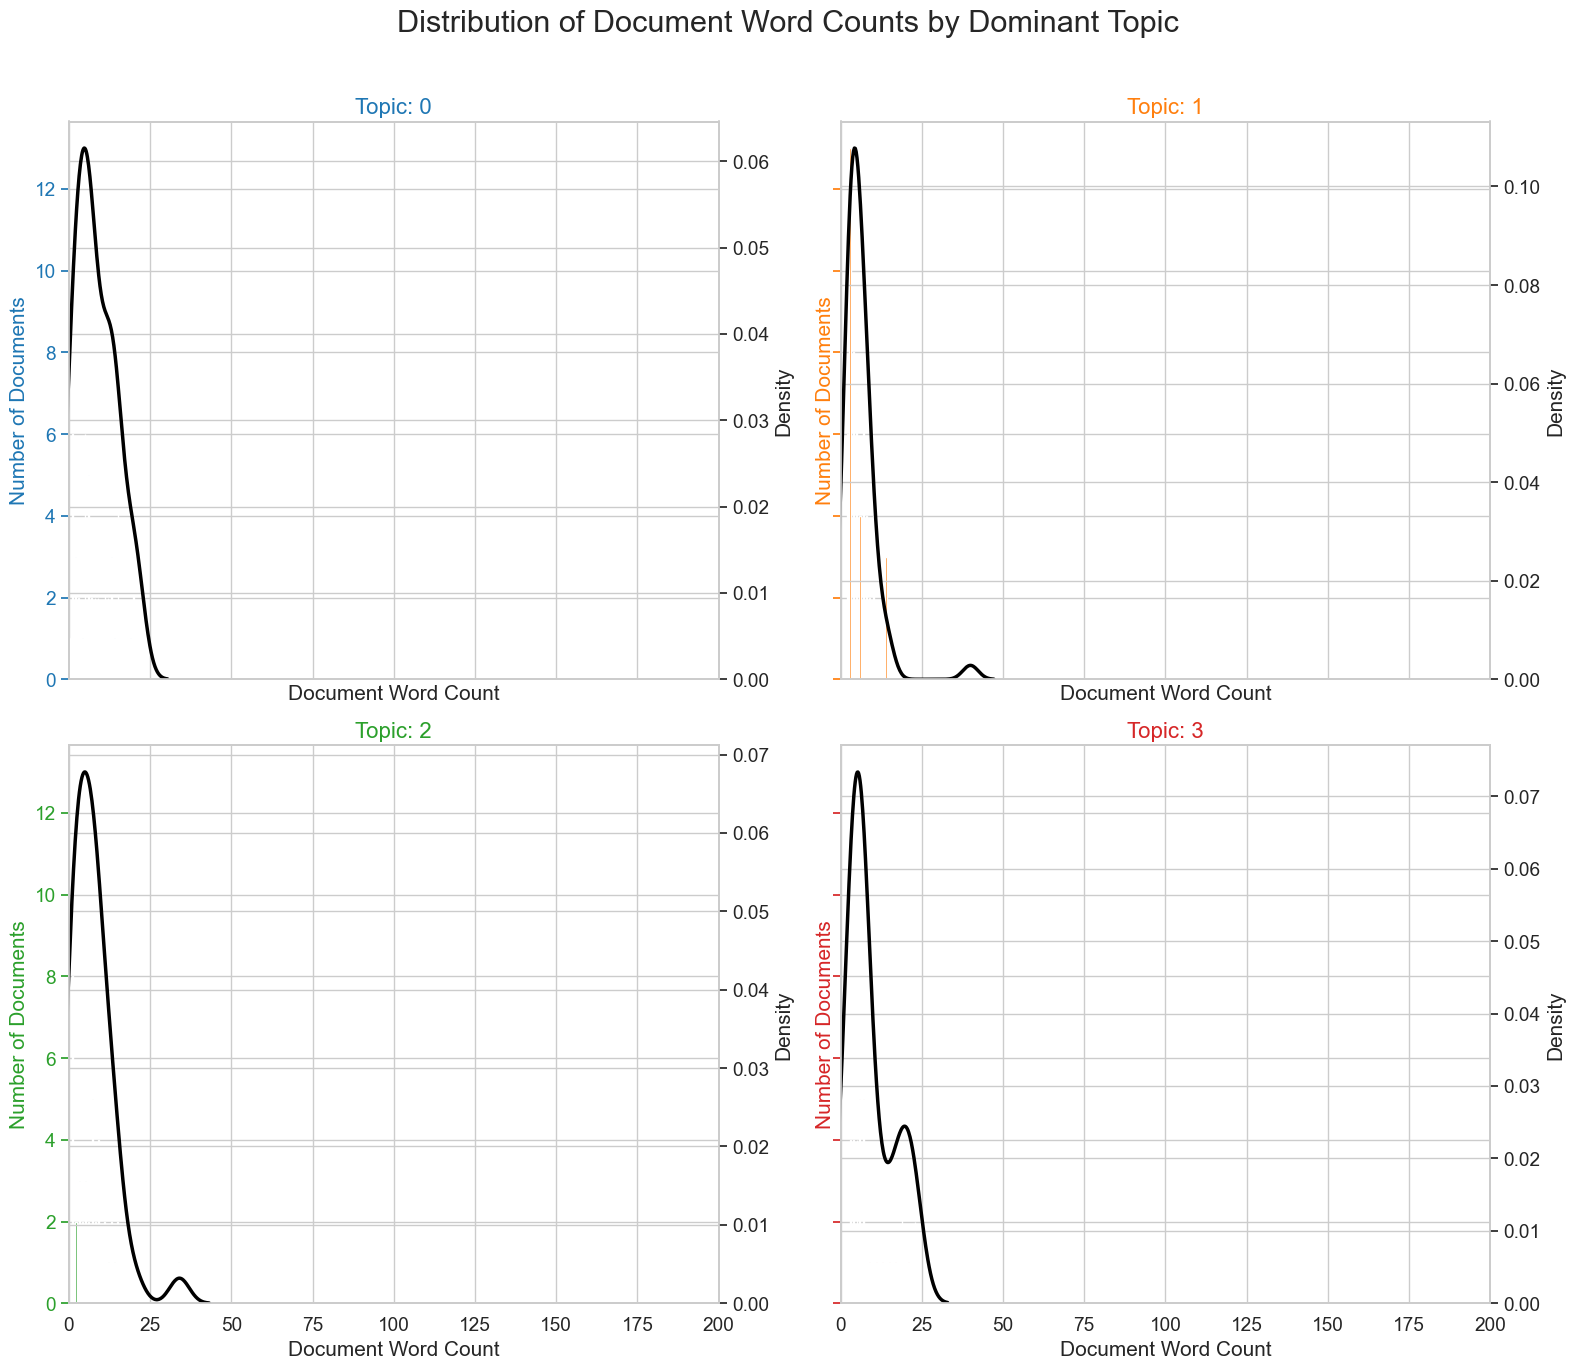

In [39]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=100, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 200), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,200,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()


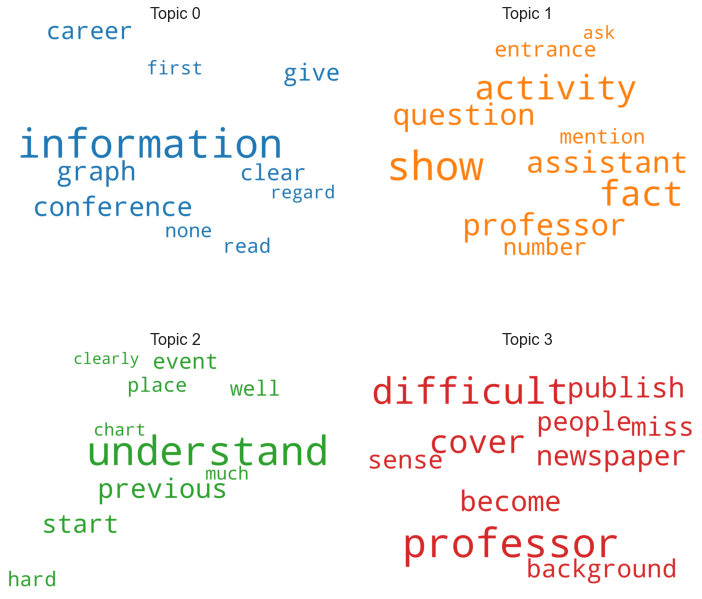

In [40]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()